# Iris Flower Unsupervised Classification

Team 4

Team Members:
    
Tanvi Salat 
Harshita Mittal 
Virtika Kamra
Saumya Dabas
Ambica Ghai

The data set consists of 150 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
The goal is to create a machine learning model that can learn from the measurements of these irises whose species are already known, so that we can predict the species for the new irises founded.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
iris_df =pd.read_csv('IRIS.csv')
iris_df.shape

(150, 5)

In [28]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [29]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

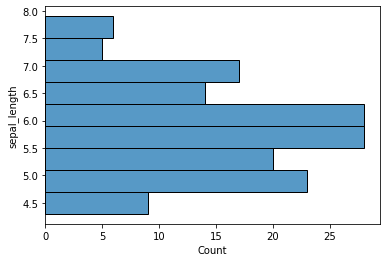

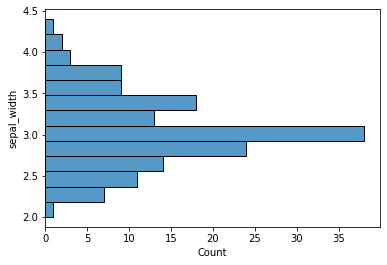

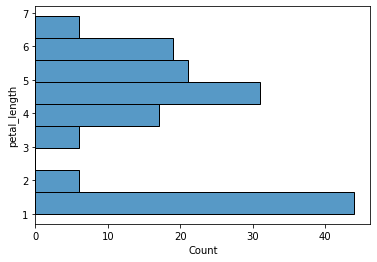

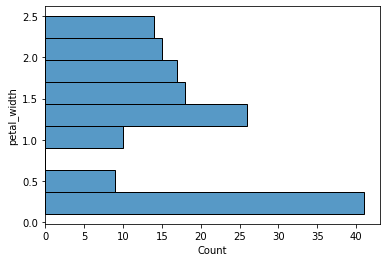

In [32]:
df_ = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
cols = df_.columns
for i in cols:
    sns.histplot(y=iris_df[i])
    plt.show()

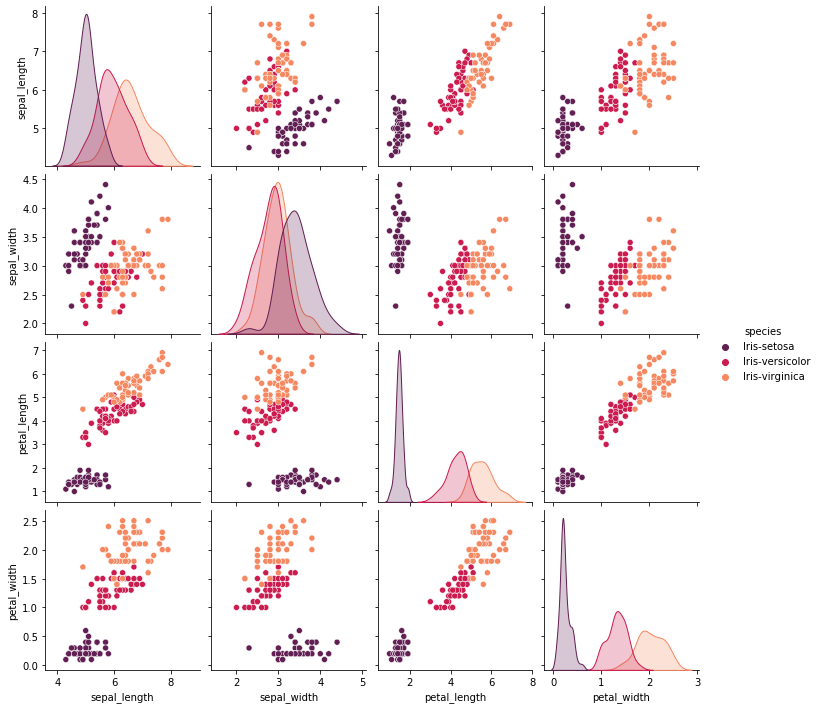

In [33]:
g = sns.pairplot(iris_df, hue="species", palette="rocket", diag_kind="kde")
plt.show()

Iris-setosa is easily separable

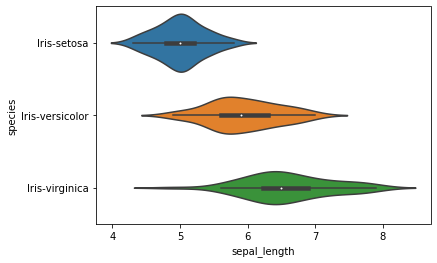

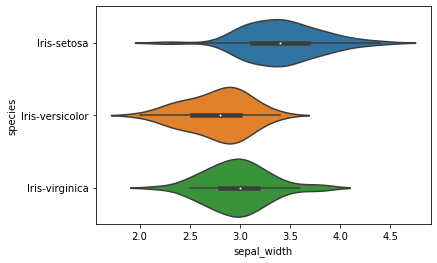

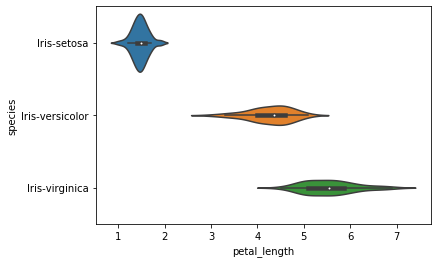

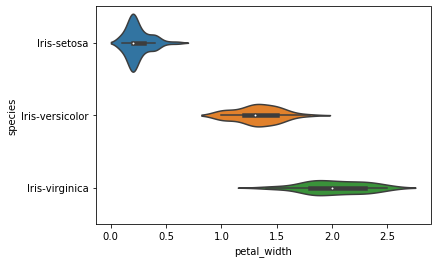

In [34]:
g = sns.violinplot(y='species', x='sepal_length', data=iris_df)
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=iris_df)
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=iris_df)
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=iris_df)
plt.show()

# Adjusting data for classification

In [35]:
X=iris_df.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]

In [36]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# K-means clustering

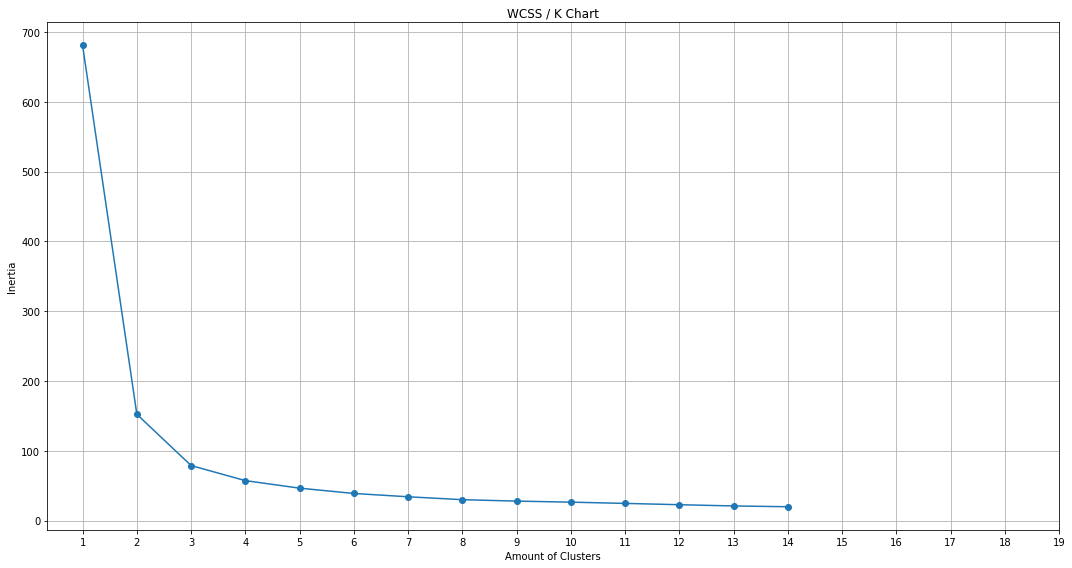

In [37]:
from sklearn.cluster import KMeans
temp = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    temp.append(kmeans.inertia_)


plt.figure(figsize=(15,8))
plt.title("WCSS / K Chart")
plt.plot(range(1,15),temp,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters")
plt.ylabel("Inertia")
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

So, 3 or 2 seems better for n_clusters according to the elbow rule

To double check, we compare K values of 2, 3, 4 and 5.

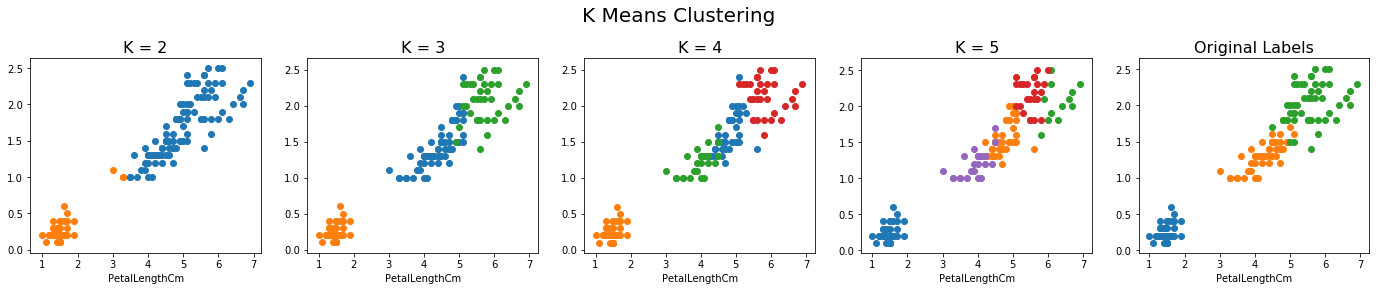

In [38]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
X["labels"] = kmeans.fit_predict(X)
plt.scatter(X.petal_length[X.labels == 0],X.petal_width[X.labels == 0])
plt.scatter(X.petal_length[X.labels == 1],X.petal_width[X.labels == 1])

X.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,2)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
X["labels"] = kmeans.fit_predict(X)
plt.scatter(X.petal_length[X.labels == 0],X.petal_width[X.labels == 0])
plt.scatter(X.petal_length[X.labels == 1],X.petal_width[X.labels == 1])
plt.scatter(X.petal_length[X.labels == 2],X.petal_width[X.labels == 2])

X.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
X["labels"] = kmeans.fit_predict(X)
plt.scatter(X.petal_length[X.labels == 0],X.petal_width[X.labels == 0])
plt.scatter(X.petal_length[X.labels == 1],X.petal_width[X.labels == 1])
plt.scatter(X.petal_length[X.labels == 2],X.petal_width[X.labels == 2])
plt.scatter(X.petal_length[X.labels == 3],X.petal_width[X.labels == 3])

X.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 5",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=5)
X["labels"] = kmeans.fit_predict(X)
plt.scatter(X.petal_length[X.labels == 0],X.petal_width[X.labels == 0])
plt.scatter(X.petal_length[X.labels == 1],X.petal_width[X.labels == 1])
plt.scatter(X.petal_length[X.labels == 2],X.petal_width[X.labels == 2])
plt.scatter(X.petal_length[X.labels == 3],X.petal_width[X.labels == 3])
plt.scatter(X.petal_length[X.labels == 4],X.petal_width[X.labels == 4])

X.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(iris_df.petal_length[iris_df.species == "Iris-setosa"],iris_df.petal_width[iris_df.species == "Iris-setosa"])
plt.scatter(iris_df.petal_length[iris_df.species == "Iris-versicolor"],iris_df.petal_width[iris_df.species == "Iris-versicolor"])
plt.scatter(iris_df.petal_length[iris_df.species == "Iris-virginica"],iris_df.petal_width[iris_df.species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

K=3 seems appropriate.

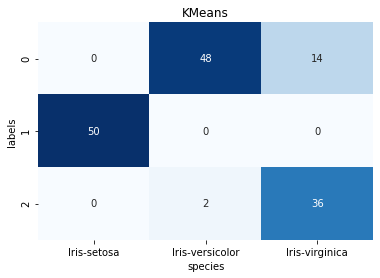

In [39]:
# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(X)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"species":iris_df['species']})
ct1 = pd.crosstab(df1['labels'],df1['species'])

sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")
plt.title("KMeans")
plt.show()

Failed on 16 data points over 150 data points, which is equal to 90%.
We also see that clustering "iris-setosa" was easy that is 100% success because its data points are all easily differentiable.
 "Iris-virginica" is difficult to cluster since it has 72% (36/50) success.